In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 📍 Add project root to path so imports like 'from strategies...' work
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from strategies.current_algo import AdvancedTradingAlgorithm, backtest_algorithm


In [3]:
# 📘 Cell 2: Load Data
# Replace with the exact file you want to test
symbol = "AAPL"
period = "1y"
data_path = f"../data/processed/{symbol}_{period}.csv"
df = pd.read_csv(data_path, parse_dates=['date'])
df.set_index("date", inplace=True)
df = df[['open', 'high', 'low', 'close', 'volume']]
df.dropna(inplace=True)

In [4]:
results_df, performance, algo = backtest_algorithm(df)

Calculating technical indicators...
Executing trading strategy...

ALGORITHM PERFORMANCE SUMMARY
No trades executed


In [5]:
pd.DataFrame(algo.trades).tail()


""


In [6]:
print("\n📈 Performance Metrics")
for k, v in performance.items():
    print(f"{k}: {v}")


📈 Performance Metrics
error: No trades executed


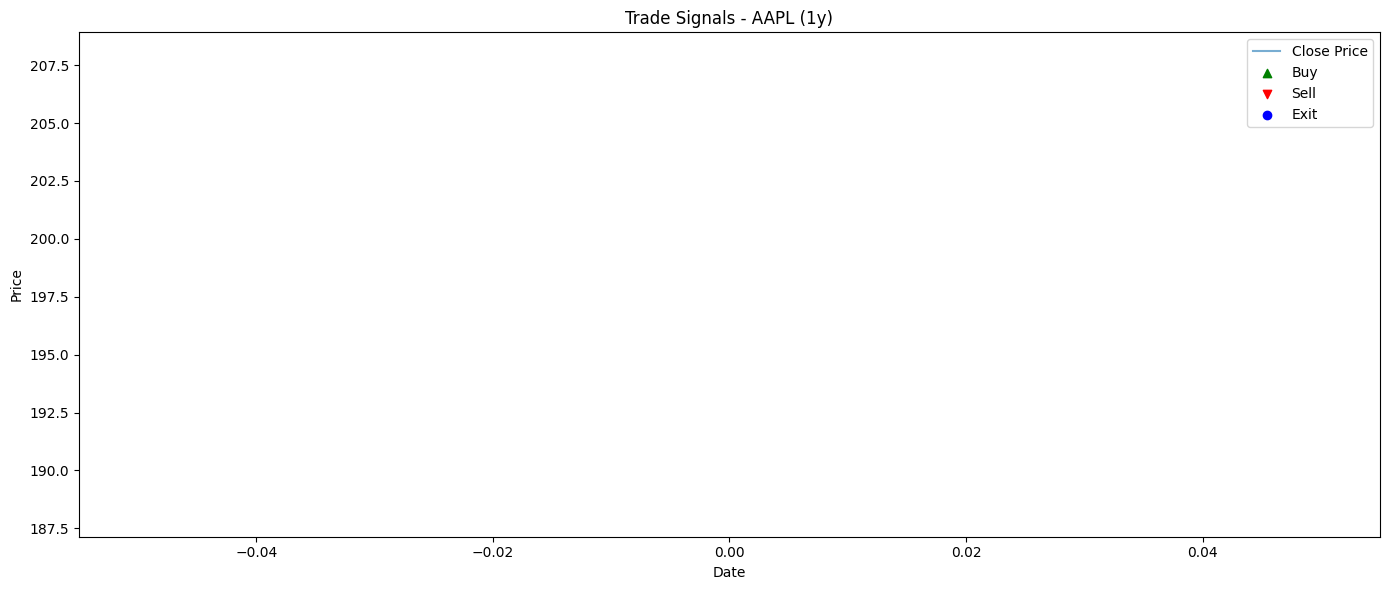

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(results_df['close'], label='Close Price', alpha=0.6)


# Plot Buy/Sell signals
buy_signals = results_df[results_df['action'] == 'BUY']
sell_signals = results_df[results_df['action'] == 'SELL']
exit_signals = results_df[results_df['action'].str.startswith("EXIT")]

plt.scatter(buy_signals.index, buy_signals['close'], label='Buy', marker='^', color='green')
plt.scatter(sell_signals.index, sell_signals['close'], label='Sell', marker='v', color='red')
plt.scatter(exit_signals.index, exit_signals['close'], label='Exit', marker='o', color='blue')

plt.title(f"Trade Signals - {symbol} ({period})")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [8]:

# 📘 Cell 6: Optional - Export Results
df_out = results_df.copy()
df_out.to_csv(f"../backtests/results/baseline/{symbol}_{period}_trades.csv")
print(f"✅ Trade results exported to backtests/results/baseline/{symbol}_{period}_trades.csv")


✅ Trade results exported to backtests/results/baseline/AAPL_1y_trades.csv
